In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# The Sequential model API

 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model
# shape is the shape of each training data
model = Sequential([
    Flatten(input_shape = (64,)),
    Dense(16, activation = 'relu',name='layer_1'),
    Dense(16, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8),
    Softmax()
])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 64)                0         
                                                                 
 layer_1 (Dense)             (None, 16)                1040      
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 softmax (Softmax)           (None, 8)                 0         
                                                                 
Total params: 1,720
Trainable params: 1,720
Non-trainabl

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (28,28,1), data_format = 'channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics
model.compile(    
    optimizer = tf.keras.optimizers.Adam(learning_rate=.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
# Print the resulting model attributes
print(model.loss, model.optimizer, model.metrics)

<keras.losses.SparseCategoricalCrossentropy object at 0x7f4427a7bf90> <keras.optimizer_v2.adam.Adam object at 0x7f4427a7bf10> []


***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [ ]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255;
test_images = test_images/255;

In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

Ankle boot


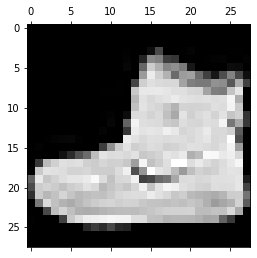

In [ ]:
# Display one of the images
plt.matshow(train_images[0])
print(labels[train_labels[0]])

#### Fit the model

In [ ]:
history = model.fit(train_images[..., np.newaxis], train_labels, epochs = 8, batch_size = 256)

Epoch 1/8
235/235 [==============================] - 20s 83ms/step - loss: 0.8288 - sparse_categorical_accuracy: 0.7273 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 [==============================] - 13s 55ms/step - loss: 0.4996 - sparse_categorical_accuracy: 0.8214 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 [==============================] - 13s 56ms/step - loss: 0.4437 - sparse_categorical_accuracy: 0.8432 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 [==============================] - 13s 56ms/step - loss: 0.4134 - sparse_categorical_accuracy: 0.8546 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 [==============================] - 13s 56ms/step - loss: 0.3918 - sparse_categorical_accuracy: 0.8633 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 [==============================] - 13s 57ms/step - loss: 0.3768 - sparse_categorical_accuracy: 0.8675 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 [==============================] - 14s 59ms/step - loss: 0.3645 - sparse_categoric

#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head(8)

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.828787,0.727283,4.420000
1,0.499641,0.821400,4.419999
2,0.443732,0.843167,4.420000
3,0.413385,0.854633,4.420001
4,0.391813,0.863350,4.420000
5,0.376796,0.867483,4.420001
6,0.364546,0.872150,4.419999
7,0.355899,0.875217,4.420002


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

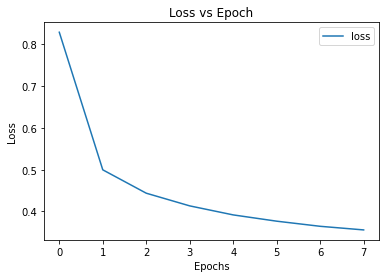

In [ ]:
# Make a plot for the loss

loss_plot = df.plot(y = 'loss', title = "Loss vs Epoch" )
loss_plot.set(xlabel = "Epochs", ylabel = "Loss")

[Text(0, 0.5, 'SCA'), Text(0.5, 0, 'Epochs')]

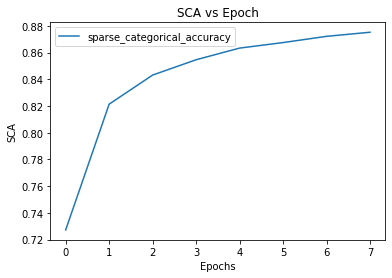

In [ ]:
# Make a plot for the accuracy

acc_plot = df.plot(y = 'sparse_categorical_accuracy', title = "SCA vs Epoch" )
acc_plot.set(xlabel = "Epochs", ylabel = "SCA")

[Text(0, 0.5, 'MEA'), Text(0.5, 0, 'Epochs')]

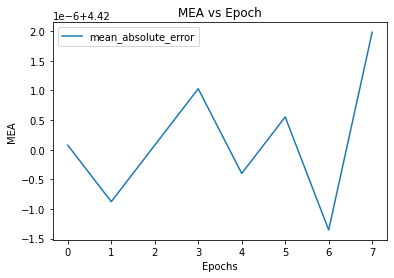

In [ ]:
# Make a plot for the additional metric

mea_plot = df.plot(y = 'mean_absolute_error', title = "MEA vs Epoch" )
mea_plot.set(xlabel = "Epochs", ylabel = "MEA")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
SCC, SPA, MAE = model.evaluate(test_images[..., np.newaxis], test_labels, verbose = 0)

In [ ]:
SCC, SPA, MAE

(0.3796989619731903, 0.8665000200271606, 4.419997215270996)

#### Make predictions from the model

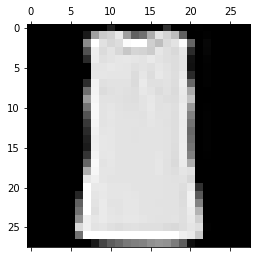

Label: Shirt
Predicted Label: T-shirt/top


In [ ]:
# Choose a random test image
random_inx = np.random.choice(test_images.shape[0])
test_image = test_images[random_inx]
plt.matshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

y_pred = model.predict(test_image.reshape(-1,28,28,1))

print(f"Predicted Label: {labels[np.argmax(y_pred[0])]}")